# This is Predicting the NBA's MVP voting Part 3:

## Training machine learning algorithm to predict the MVPs voting

Most Valuable Player (MVP) voting occurs each season (year) in the NBA league, in this project, we'll create a dataset and make it ready to apply a machine learning (ML) algorithm that will help us predict the results of the MVP voting based on the player and team statistics.

This project is an end-to-end project that will show the use of web scraping, data cleaning as well as ML techniques and libraries, to get and produce a dataset that is relevant to a predictive question, followed by data cleaning, manipulation, and prediction.



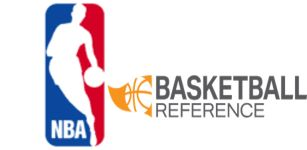




In [ ]:
import pandas as pd

In [101]:
stats = pd.read_csv("player_mvp_stats.csv")

In [102]:
stats

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,14692,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14693,14693,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14694,14694,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14695,14695,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


In [103]:
del stats["Unnamed: 0"] #delete this column.

**Let's check for null values in our data:**

In [104]:
pd.isnull(stats).sum()

Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          59
3P            0
3PA           0
3P%        2086
2P            0
2PA           0
2P%         100
eFG%         59
FT            0
FTA           0
FT%         521
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: int64

**We can see that we have 5 columns with null values, and 2 of them with quite a lot of nulls. We can also see that all these 5 are of % values, so these nulls can be a result of values of 0 in the columns used to calculate these % stats.**

**Let's check if that's the case for the nulls in "3P%" and "FT%" columns which calculate their % from the "3PA" and "FTA" columns respectively:**

In [105]:
stats[pd.isnull(stats["3P%"])][["Player", "3PA"]]

,Player,3PA
2,Elden Campbell,0.0
3,Irving Thomas,0.0
18,Jack Haley,0.0
20,Keith Owens,0.0
30,Benoit Benjamin,0.0
...,...,...
14666,Evan Eschmeyer,0.0
14667,Gheorghe Mureșan,0.0
14669,Jim McIlvaine,0.0
14675,Mark Hendrickson,0.0


In [106]:
stats[pd.isnull(stats["FT%"])][["Player", "FTA"]]

,Player,FTA
77,John Coker,0.0
92,Jason Sasser,0.0
103,Adrian Caldwell,0.0
119,Bruno Šundov,0.0
158,Jamal Robinson,0.0
...,...,...
14556,Mark McNamara,0.0
14584,Luke Zeller,0.0
14637,Myron Brown,0.0
14659,Malcolm Lee,0.0


**Indeed, rows with null values in the "3P%" and "FT%" columns also have 0.0 values in their "3PA" or "FTA" columns.**

**To make things simple, let's replace all these null values with 0:**

In [107]:
stats = stats.fillna(0)

## Training a Machine Learning Model

**Let's start our first attempt at a machine-learning model. To do that we first need to specify and decide what features or predictors we'll use from the dataset's columns.**

**In this case we'll use numeric columns only as our predictors so let's first isolate those.**

In [108]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

**So for the list of predictors we're not going to use: 'Player', 'Pos', 'Tm', and 'Team' cause those are strings.**

**All of the rest are numeric and can be used, except for the columns we want to predict, which is the mvps columns: 'Pts Won', 'Pts Max', and 'Share'.**

**As we try to predict the 'Share' column, 'Pts Won' and 'Pts Max' are highly correlated with the 'Share' value and are actually used to calculate it. Using those as predictors can cause our algorithm to overfit.** 

In [109]:
predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS']

**Let's now create our training and testing dataset, these will be all the stats data before the year 2022 for the training and stats data of 2022 for the test.**

In [122]:
train = stats[stats["Year"] < 2022]

In [123]:
test = stats[stats["Year"] == 2022]

In [124]:
test["Share"].value_counts()

0.000    593
0.001      3
0.875      1
0.706      1
0.002      1
0.216      1
0.043      1
0.004      1
0.146      1
0.595      1
0.010      1
Name: Share, dtype: int64

**For our model we'll Ridge regression, which is a form of linear-regression model, designed to prevent overfitting, and doing so by shrinking the linear regression coefficients.**

In [125]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [126]:
reg.fit(train[predictors], train["Share"])

Ridge(alpha=0.1)

In [127]:
predictions = reg.predict(test[predictors])

In [128]:
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)

In [129]:
predictions

,predictions
648,0.012934
649,-0.028143
650,-0.006163
651,0.016564
652,-0.004820
...,...
12508,-0.019380
12509,-0.010197
12510,0.003810
12511,0.001162


In [130]:
combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)

In [131]:
combination

,Player,Share,predictions
648,Aaron Gordon,0.0,0.012934
649,Austin Rivers,0.0,-0.028143
650,Bol Bol,0.0,-0.006163
651,Bones Hyland,0.0,0.016564
652,Bryn Forbes,0.0,-0.004820
...,...,...,...
12508,Micah Potter,0.0,-0.019380
12509,Rodney McGruder,0.0,-0.010197
12510,Saben Lee,0.0,0.003810
12511,Saddiq Bey,0.0,0.001162


In [132]:
combination.sort_values("Share", ascending=False).head(10)

,Player,Share,predictions
663,Nikola Jokić,0.875,0.190365
837,Joel Embiid,0.706,0.190462
11678,Giannis Antetokounmpo,0.595,0.219409
907,Devin Booker,0.216,0.091309
11469,Luka Dončić,0.146,0.157395
1179,Jayson Tatum,0.043,0.095903
12226,Ja Morant,0.010,0.120508
6398,Stephen Curry,0.004,0.093137
905,Chris Paul,0.002,0.078328
8241,LeBron James,0.001,0.157827


**Let's check our error metric to see how the algorithm really performed:**

In [133]:
from sklearn.metrics import mean_squared_error

mean_squared_error(combination["Share"], combination["predictions"])

0.002240037320173769

In [134]:
combination["Share"].value_counts()

0.000    593
0.001      3
0.875      1
0.706      1
0.002      1
0.216      1
0.043      1
0.004      1
0.146      1
0.595      1
0.010      1
Name: Share, dtype: int64

**We can see that most players did not get any mvp votes so most of the "Share" values are 0.0.**

So this error metric is not suitable

In [135]:
combination = combination.sort_values("Share", ascending=False)
combination["Rk"] = list(range(1, combination.shape[0]+1))

In [136]:
combination.head(10)

,Player,Share,predictions,Rk
663,Nikola Jokić,0.875,0.190365,1
837,Joel Embiid,0.706,0.190462,2
11678,Giannis Antetokounmpo,0.595,0.219409,3
907,Devin Booker,0.216,0.091309,4
11469,Luka Dončić,0.146,0.157395,5
1179,Jayson Tatum,0.043,0.095903,6
12226,Ja Morant,0.010,0.120508,7
6398,Stephen Curry,0.004,0.093137,8
905,Chris Paul,0.002,0.078328,9
8241,LeBron James,0.001,0.157827,10


In [137]:
combination = combination.sort_values("predictions", ascending=False)
combination["Predicted_Rk"] = list(range(1, combination.shape[0]+1))

In [138]:
combination.head(10)

,Player,Share,predictions,Rk,Predicted_Rk
11678,Giannis Antetokounmpo,0.595,0.219409,3,1
837,Joel Embiid,0.706,0.190462,2,2
663,Nikola Jokić,0.875,0.190365,1,3
8241,LeBron James,0.001,0.157827,10,4
11469,Luka Dončić,0.146,0.157395,5,5
6185,Kevin Durant,0.001,0.140626,12,6
12226,Ja Morant,0.010,0.120508,7,7
11820,Trae Young,0.000,0.109246,289,8
8231,Anthony Davis,0.000,0.107306,112,9
836,James Harden,0.000,0.103584,393,10


**Using the actual or predicted ranking ("Rk") metric we've created we can clearly see if our predictions match the actual votes.**

**Considering that we want to focus on the top 5 or 10 players the ranking values are clear enough for matching and also to clearly see outliers.**
**We now need to find a suitable error metric, one that could verify of the top 5 of the mvp race, how many players did we correctly place in the top five (did we correctly predict all the top 5).**

**We can try to use the average precision error metric, while it's not common to use this error metric in regression machine learning algorithms because it deals with ranking, we do have ranking involved in this specific problem.**

In [139]:
combination.sort_values("Share", ascending=False).head(10)

,Player,Share,predictions,Rk,Predicted_Rk
663,Nikola Jokić,0.875,0.190365,1,3
837,Joel Embiid,0.706,0.190462,2,2
11678,Giannis Antetokounmpo,0.595,0.219409,3,1
907,Devin Booker,0.216,0.091309,4,17
11469,Luka Dončić,0.146,0.157395,5,5
1179,Jayson Tatum,0.043,0.095903,6,13
12226,Ja Morant,0.010,0.120508,7,7
6398,Stephen Curry,0.004,0.093137,8,15
905,Chris Paul,0.002,0.078328,9,21
3938,DeMar DeRozan,0.001,0.099240,11,11


In [173]:
def find_ap(combination):
    actual = combination.sort_values("Share", ascending=False).head(5)
    predicted = combination.sort_values("predictions", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found/seen)
        seen += 1
    return sum(ps)/len(ps)

In [174]:
find_ap(combination) #This error metrics signifies how many tries it took until each of the actuaL top 5 mvps found in the predicted, a value of 1 is a perfect match (i.e. 5 tries).

0.8188235294117646

**Implementing backtesting to predict each year.**

**This type of testing is good because it makes our parametric more robust, if we testing for example a single year there could have been something wrong with the MVP voting of that year, and even if the algorithm looks good, it doesn't necessarily mean that we have a good algorithm. So the more years that we'll test the more confidence we have that the algorithm is not going to overfit.**


In [175]:
years = list(range(1991,2022))

In [181]:
aps = []
all_predictions = []
for year in years[5:]:
    train = stats[stats["Year"] < year]
    test = stats[stats["Year"] == year]
    reg.fit(train[predictors], train["Share"])
    predictions = reg.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
    combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
    all_predictions.append(combination)
    aps.append(find_ap(combination))

In [182]:
sum(aps)/len(aps)

0.7112884360789578

**diagnostics - a function that checks the difference between actual to predicted rankings.**

**This sort of diagnostics allows us to create a table and actually see what is the difference of actual vs. predicted for the top 5 mvps and in how many ranks the algorithm is wrong.**

In [150]:
def add_ranks(combination):
    combination = combination.sort_values("Share", ascending=False)
    combination["Rk"] = list(range(1, combination.shape[0]+1))
    combination = combination.sort_values("predictions", ascending=False)
    combination["Predicted_Rk"] = list(range(1, combination.shape[0]+1))
    combination["Diff"] = combination["Rk"] - combination["Predicted_Rk"]
    return combination

In [155]:
ranking = add_ranks(all_predictions[1])
ranking[ranking["Rk"] < 6].sort_values("Diff", ascending=False)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
11678,Giannis Antetokounmpo,0.595,0.266345,3,1,2
837,Joel Embiid,0.706,0.237745,2,2,0
11469,Luka Dončić,0.146,0.166434,5,5,0
663,Nikola Jokić,0.875,0.234536,1,3,-2
907,Devin Booker,0.216,0.108735,4,16,-12


**Now let's build a back-testing function to make it easy to continue testing without creating new script with the for loops again and again.**

**This function will actually use the "ad_ranks" and "find_ap" functions as sub-functions and will give us the mean average precision (mean_ap), a list of all the aps generated, and a data frame of all of the predictions.**

In [233]:
def backtest(stats, model, year, predictors):
    aps = []
    all_predictions = []
    for year in years[5:]:
        train = stats[stats["Year"] < year]
        test = stats[stats["Year"] == year]
        model.fit(train[predictors], train["Share"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps)/len(aps), aps, pd.concat(all_predictions)

In [188]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [189]:
mean_ap

0.7112884360789578

### Diagnosting model performance

In [191]:
all_predictions[all_predictions["Rk"] <= 5].sort_values("Diff").head(10)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
1334,Jason Kidd,0.712,0.028210,2,52,-50
8642,Glen Rice,0.117,0.033110,5,53,-48
5420,Steve Nash,0.839,0.034100,1,45,-44
8910,Peja Stojaković,0.228,0.036270,4,38,-34
5438,Steve Nash,0.739,0.054129,1,34,-33
13331,Joakim Noah,0.258,0.046968,4,37,-33
3849,Chauncey Billups,0.344,0.052696,5,35,-30
1499,Chris Paul,0.138,0.072293,5,33,-28
5453,Steve Nash,0.785,0.074421,2,21,-19
4912,Tim Hardaway,0.207,0.059984,4,20,-16


**Another thing we can do is look into the regression coefficients. The highest coefficients indicate the variable that is most important to the regression.**


In [195]:
predictor_coefficients = pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis=1).sort_values(0, ascending=False)

In [197]:
predictor_coefficients.head(6)

,0,1
13,0.070001,eFG%
18,0.035041,DRB
29,0.027129,W/L%
17,0.021610,ORB
10,0.016945,2P
21,0.011635,STL


### Adding more predictors

**To give the model some information, let's now add some more predictors.**

**One way to get more information is to make ratios of different stats values as predictors. Let's pick the following and calculate the ratios of their values divided by the column mean for that season:**

**Stats for ratios:**

"PTS" - Points per Game

"AST" - Assist per Game

"STL" - Steals per Game

"BLK" - Blocks per Game

"3P" - 3-Point Field Goals per Game

"Year" - The year or the season

In [203]:
stats_ratios = stats[["PTS", "AST", "STL", "BLK", "3P", "Year"]].groupby("Year", group_keys=False).apply(lambda x: x/x.mean())

In [204]:
stats_ratios

,PTS,AST,STL,BLK,3P,Year
0,1.013334,0.420714,0.961127,0.673469,0.508587,1.0
1,1.614653,1.028412,1.647646,0.673469,4.577279,1.0
2,0.311795,0.093492,0.274608,1.571429,0.000000,1.0
3,0.200440,0.186984,0.274608,0.000000,0.000000,1.0
4,2.383005,1.636110,1.784950,0.897959,1.525760,1.0
...,...,...,...,...,...,...
14692,0.735752,0.819562,0.479763,1.528302,0.650951,1.0
14693,0.071202,0.000000,0.000000,0.000000,0.130190,1.0
14694,1.281633,0.601012,1.119447,2.547170,0.520761,1.0
14695,0.474679,0.218550,0.319842,1.273585,0.650951,1.0


In [207]:
#Add the stats_ratios as columns to the stats dataframe:
stats[["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]] = stats_ratios[["PTS", "AST", "STL", "BLK", "3P"]]

In [206]:
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,W/L%,GB,PS/G,PA/G,SRS,PTS_R,AST_R,STL_R,BLK_R,3P_R
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.707,5.0,106.3,99.6,6.73,1.013334,0.420714,0.961127,0.673469,0.508587
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,0.707,5.0,106.3,99.6,6.73,1.614653,1.028412,1.647646,0.673469,4.577279
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,0.707,5.0,106.3,99.6,6.73,0.311795,0.093492,0.274608,1.571429,0.000000
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,0.707,5.0,106.3,99.6,6.73,0.200440,0.186984,0.274608,0.000000,0.000000
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,0.707,5.0,106.3,99.6,6.73,2.383005,1.636110,1.784950,0.897959,1.525760


**Now let's also add the ratio columns to our predictors and run the model again.**

In [264]:
predictors += ["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]

In [209]:
mean_ap, aps, all_predictors = backtest(stats, reg, years[5:], predictors)

In [210]:
mean_ap

0.7208380973034985

We can see that by adding these new ratio predictors, we managed to slightly improve the error metric from 0.711 to 0.72.

**To give this model, which relies on numerical predictors, more information we can also consider columns that have string values. If the values can be relevant the strings can be converted into a numerical code.**

**Such columns can be the "Pos" and "Tm" columns, which state the position the player has played that season and the team he has played for that year respectively.**

While position played could be a factor contributing to other stats like points for example or blocks (if you are on defense), the team which the player has played for could also be a contributing factor. Let's also validate that.

**Let's use the astype() method to transform this string categorical values into numerical values to add to our model:**

**One issue with this approach is that the linear regression algorithm makes use of ordinal numerical values (Ord) that signify a measure or size of a parameter and follow a linear relationship. Our newly created numerical values for "Pos" and "Tm" are cardinal and cannot be dealt with by linear regression.**

**The solution for this is to use a different kind of algorithm, one that can get proper predictions using these predictors, and the type of algorithm we'll test for that is a "Random Forest".**

In [217]:
stats["NPos"] = stats["Pos"].astype("category").cat.codes

In [218]:
stats["NTm"] = stats["Tm"].astype("category").cat.codes

In [215]:
stats["Pos"].unique() #The uinique categorial string values in Pos

array(['PF', 'SG', 'SF', 'PG', 'C', 'PG-SG', 'PF-SF', 'SG-PG', 'PF-C',
       'SG-SF', 'SF-PF', 'SF-SG', 'C-PF', 'SG-PF', 'PG-SF', 'SG-PG-SF',
       'SF-C'], dtype=object)

In [216]:
stats["NPos"].unique() #The uinique categorial numeric values in NPos

array([ 2, 12,  8,  5,  0,  7,  4, 14,  3, 16, 10, 11,  1, 13,  6, 15,  9],
      dtype=int8)

In [299]:
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PS/G,PA/G,SRS,PTS_R,AST_R,STL_R,BLK_R,3P_R,NPos,NTm
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,106.3,99.6,6.73,1.013334,0.420714,0.961127,0.673469,0.508587,2,15
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,106.3,99.6,6.73,1.614653,1.028412,1.647646,0.673469,4.577279,12,15
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,106.3,99.6,6.73,0.311795,0.093492,0.274608,1.571429,0.000000,2,15
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,106.3,99.6,6.73,0.200440,0.186984,0.274608,0.000000,0.000000,2,15
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,106.3,99.6,6.73,2.383005,1.636110,1.784950,0.897959,1.525760,8,15


In [295]:
predictors_rf = predictors
predictors_rf += ["Npos", "NTm"]

In [296]:
predictors_rf

['Age',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'Year',
 'W',
 'L',
 'W/L%',
 'GB',
 'PS/G',
 'PA/G',
 'SRS',
 'PTS_R',
 'AST_R',
 'STL_R',
 'BLK_R',
 '3P_R',
 'Npos',
 'NTm']

### Testing a Random Forest Model

A random forest creates a series of decision trees and averages the predictions from those trees.

Initializing conditions:

- Using 60 individual decision trees

- Set the random state to 1 to get the same results each time the code runs.

- min_smaples_split is set to 5, to ensure that we'll have a split to a different node only when there are at least 5 columns (values) in that node.

The higher you set this parameter, the faster the algorithm will be and the also more resistant to overfiting. The lower you set it, the more accurate the algorithm will be, but it will be more prone to overfiting.

In [291]:
from sklearn.ensemble import RandomForestRegressor

#Initializing the algorithm:
rf = RandomForestRegressor(n_estimators=50, random_state=1, min_samples_split=5)
mean_ap, aps, all_predictors = backtest(stats, rf, years[28:], predictors_rf) #Run the model using the backtest function, starting from year 26.

In [292]:
#"NPos" in predictors
mean_ap

0.7160867351429451

In [293]:
#Run the linear regression again from year 28 for comparison:
mean_ap, aps, all_predictors = backtest(stats, reg, years[28:], predictors_rf)

In [294]:
#"NPos" in predictors
mean_ap

0.7208380973034985

**mean_ap of:**

- "NPos" in predictors: **0.712775385238323 / reg: 0.7195799655235224**
  
- "NTm" in predictors: **0.7093875087760537 / reg: 0.7177210378422457**

- "NPos" and "NTm" in predictors: **0.7110193595055292 / reg: 0.7184008100935044**

- "Without "NPos" or "NTm" in predictors: **0.7160867351429451 / reg: 0.7208380973034985**

**Considering all the options tested with both Random Forest or linear regression, we can say that adding position and/or team as predictors to the model, did not improve the model.**

**We also can say that the Ridge linear regression performed better on this type of data.**

**When thinking about the potential contribution of the team the player played for in that season, one can say that the team's contribution is already manifested in the player's statistics data (player performance), and this can explain why there was no additional contribution to the prediction.**
